In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report,accuracy_score
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [2]:
asd_data = pd.read_csv('csv_result-Autism-Child-Data.csv', na_values=['?'])
display(asd_data)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice_born,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10,4-11 years,Parent,YES
288,289,1,0,0,0,1,0,1,0,0,...,f,White-European,yes,yes,Australia,no,4,4-11 years,Parent,NO
289,290,1,0,1,1,1,1,1,0,0,...,m,Latino,no,no,Brazil,no,7,4-11 years,Parent,YES
290,291,1,1,1,0,1,1,1,1,1,...,m,South Asian,no,no,India,no,9,4-11 years,Parent,YES


In [3]:
display(asd_data.describe())

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [4]:
asd_data.info()
#we have 10 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jaundice_born    292 non-null    object 
 15  autism           292 non-null    object 
 16  country_of_res   292 non-null    object 
 17  used_app_before 

In [5]:
display(asd_data['gender'].value_counts())

m    208
f     84
Name: gender, dtype: int64

In [6]:
display(asd_data['country_of_res'].value_counts())

United Kingdom           49
India                    42
United States            42
Australia                23
Jordan                   20
New Zealand              13
Egypt                     9
United Arab Emirates      7
Canada                    7
Bangladesh                6
Philippines               4
Pakistan                  4
Saudi Arabia              4
Russia                    3
Syria                     3
Iraq                      3
Qatar                     3
Armenia                   3
Libya                     3
Afghanistan               2
Georgia                   2
Bahrain                   2
Italy                     2
Malaysia                  2
Austria                   2
Brazil                    2
Turkey                    2
Lebanon                   2
Mexico                    2
South Africa              2
Ghana                     1
U.S. Outlying Islands     1
Nigeria                   1
Nepal                     1
Isle of Man               1
China               

In [7]:
display(asd_data['relation'].value_counts())

Parent                      214
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: relation, dtype: int64

In [8]:
display(asd_data['Class/ASD'].value_counts())

NO     151
YES    141
Name: Class/ASD, dtype: int64

# Cleaning Data

In [9]:
#cleaning the data is neccesaary for improving the accuracy of the model, I go ahead and replaced the NaN values with the mean values
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
            |(asd_data['jaundice_born'].isnull())|(asd_data['autism'].isnull()) |(asd_data['country_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice_born,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
5,6,0,0,1,0,1,1,0,1,0,...,m,NaN,no,yes,Egypt,no,5,4-11 years,NaN,NO
9,10,0,0,1,1,1,0,1,1,0,...,f,NaN,no,yes,Austria,no,5,4-11 years,NaN,NO
11,12,0,1,0,0,1,0,0,0,0,...,f,NaN,no,no,Kuwait,no,3,4-11 years,NaN,NO
19,20,1,1,1,1,1,1,0,1,0,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
21,22,0,0,1,1,0,1,0,1,1,...,f,NaN,no,no,Egypt,no,5,4-11 years,NaN,NO
24,25,1,0,1,1,1,1,0,1,1,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
28,29,0,1,1,0,0,0,1,1,0,...,m,NaN,no,yes,United Arab Emirates,no,5,4-11 years,NaN,NO
32,33,1,0,0,1,0,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,4-11 years,NaN,YES


# Data Visualisation

Here I have used violin plot, you want to observe the distribution of numeric data, as we want to make a comparison of distributions between multiple groups.

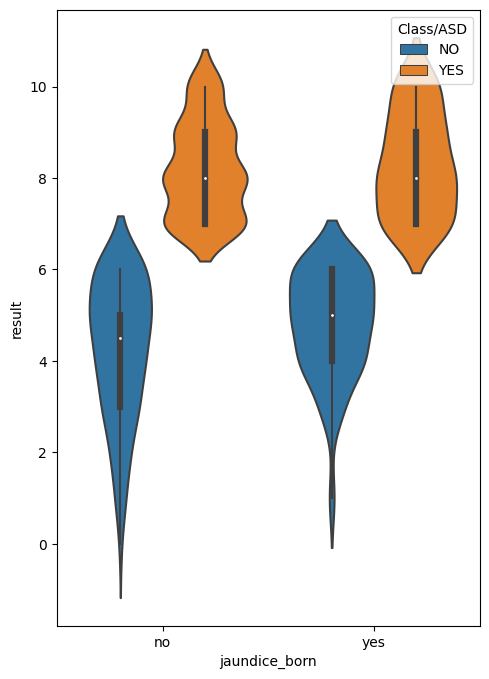

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'jaundice_born', y = 'result',hue="Class/ASD", data = asd_data[0:])
plt.show()

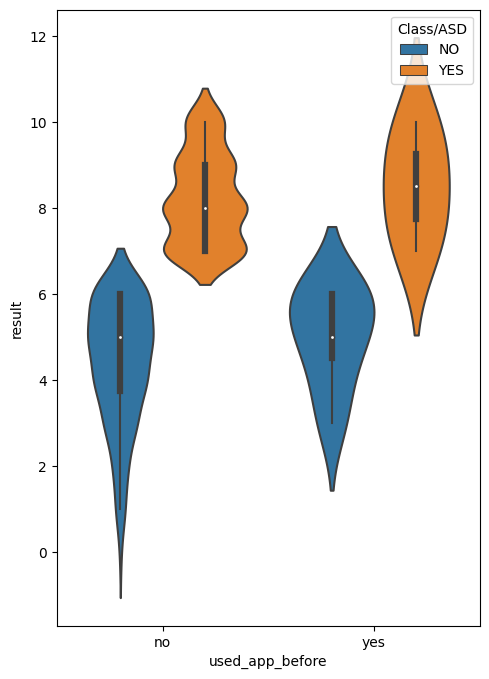

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'used_app_before', y = 'result',hue="Class/ASD", data = asd_data[0:])
plt.show()

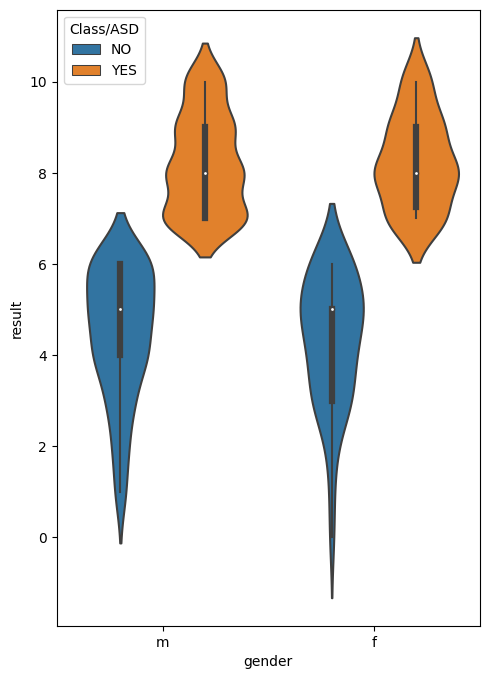

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'gender', y = 'result',hue="Class/ASD", data = asd_data[0:])
plt.show()

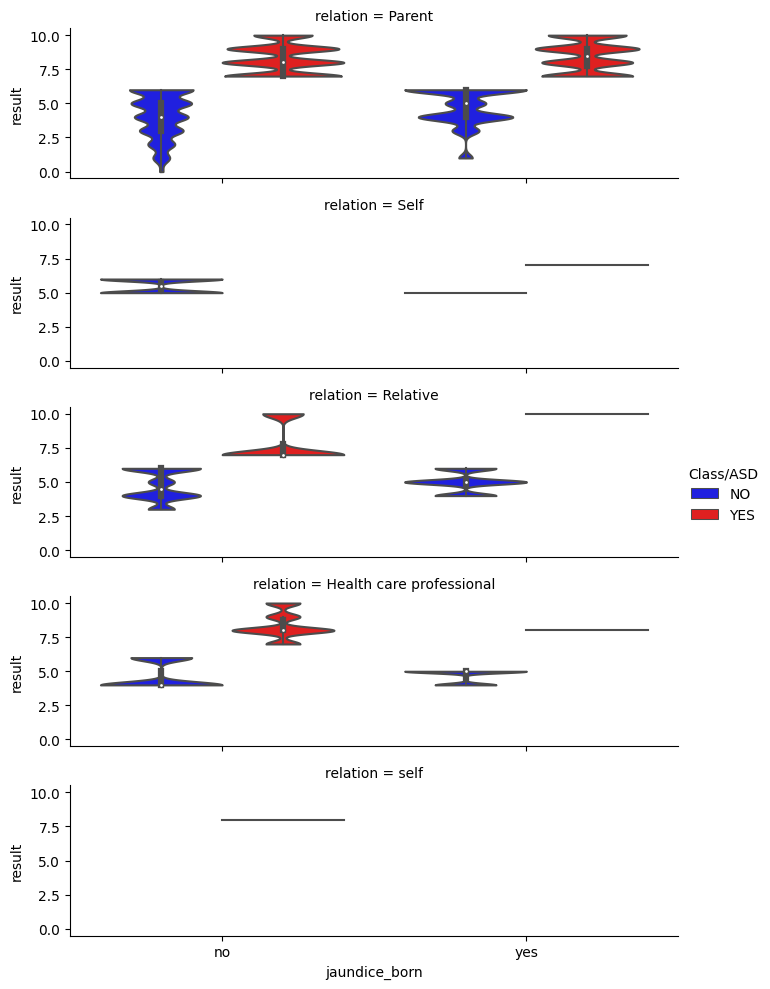

In [13]:
g = sns.catplot(x="jaundice_born", y="result",
                   hue="Class/ASD", row="relation",
                   data=asd_data,
                    orient="v", height=2, aspect=3.5, palette={'YES': "r", 'NO': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

# Normalizing Numreric data and One-hot Encoding Categorical Data

In [14]:
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jaundice_born', 'autism', 'country_of_res', 'result',
                      'used_app_before','relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [15]:
scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform)

,age,gender,ethnicity,jaundice_born,autism,country_of_res,result,used_app_before,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,Middle Eastern,no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
2,0.285714,m,NaN,no,no,Jordan,0.5,yes,NaN,1,1,0,0,0,1,1,1,0,0
3,0.142857,f,NaN,yes,no,Jordan,0.4,no,NaN,0,1,0,0,1,1,0,0,0,1
4,0.142857,m,Others,yes,no,United States,1.0,no,Parent,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.428571,f,White-European,yes,yes,United Kingdom,1.0,no,Parent,1,1,1,1,1,1,1,1,1,1
288,0.428571,f,White-European,yes,yes,Australia,0.4,no,Parent,1,0,0,0,1,0,1,0,0,1
289,0.000000,m,Latino,no,no,Brazil,0.7,no,Parent,1,0,1,1,1,1,1,0,0,1
290,0.000000,m,South Asian,no,no,India,0.9,no,Parent,1,1,1,0,1,1,1,1,1,1


In [16]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final)

# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

#the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,country_of_res_United Arab Emirates,country_of_res_United Kingdom,country_of_res_United States,used_app_before_no,used_app_before_yes,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0.285714,0.5,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0.142857,0.4,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.428571,1.0,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
288,0.428571,0.4,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
289,0.000000,0.7,1,0,1,1,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
290,0.000000,0.9,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0


87 total features after one-hot encoding. 
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jaundice_born_no', 'jaundice_born_yes', 'autism_no', 'autism_yes', 'country_of_res_Afghanistan', 'country_of_res_Argentina', 'country_of_res_Armenia', 'country_of_res_Australia', 'country_of_res_Austria', 'country_of_res_Bahrain', 'country_of_res_Bangladesh', 'country_of_res_Bhutan', 'country_of_res_Brazil', 'country_of_res_Bulgaria', 'country_of_res_Canada', 'country_of_res_China', 'country_of_res_Costa Rica', 'country_of_res_Egypt', 'country_of_res_Europe', 'country_of_res_Georgia', 'country_of_res_Germany', 'country_of_res_Ghana', 'country_of_res_India', 'cou

In [17]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

# Training and Test Data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 233 samples.
Testing set has 59 samples.


In [19]:
#filling NaN values with Mean Values

y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)

In [20]:
X_train.isnull()

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,country_of_res_United Arab Emirates,country_of_res_United Kingdom,country_of_res_United States,used_app_before_no,used_app_before_yes,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Modelling

# 1. k-NN 

In [21]:
model_kNN = KNeighborsClassifier(n_neighbors = 5)
model_kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred = model_kNN.predict(X_test)
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0]


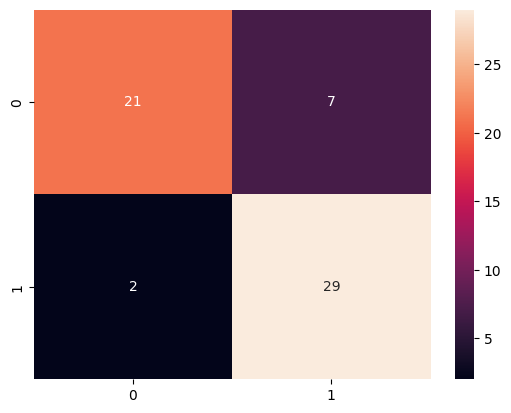

In [23]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [24]:
print(accuracy_score(y_test,y_pred))

0.847457627118644


In [25]:
print(f1_score(y_test,y_pred))

0.8656716417910448


# 2. Naive Bayes

In [26]:
model_bNB = BernoulliNB()  
model_bNB.fit(X_train, y_train)

BernoulliNB()

In [27]:
y_pred = model_bNB.predict(X_test)  
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0]


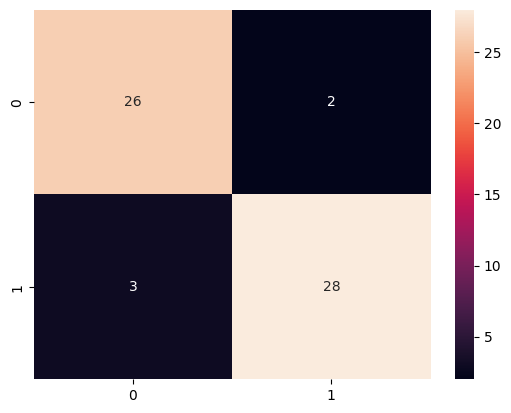

In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [29]:
print(accuracy_score(y_test,y_pred))

0.9152542372881356


In [30]:
print(f1_score(y_test,y_pred))

0.9180327868852459


# 3. Decision Trees

In [31]:
model_dectree = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training set
model_dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [32]:
y_pred = model_dectree.predict(X_test)
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]


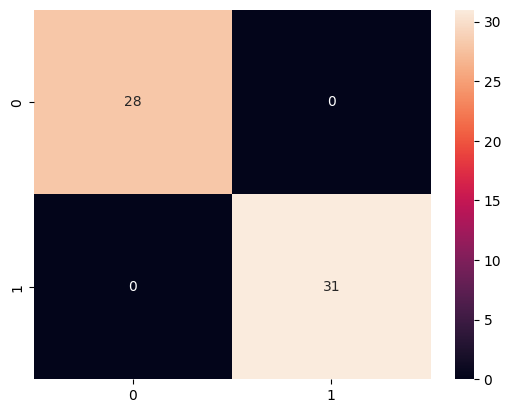

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [34]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [35]:
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN)) #Classification Accuracy

Classification Accuracy: 1.0


In [36]:
print(f1_score(y_test,y_pred))

1.0


In [37]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [1, 0.1, 0.01],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [1, 0.1, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [38]:
pred = grid_search.predict(X_test)
accuracy_score(y_test,pred)

0.9661016949152542

In [39]:
f1_score(y_test,pred)

0.9666666666666666

# 4. Random Forest

In [40]:
model_ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
model_ranfor.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [41]:
y_pred = model_ranfor.predict(X_test)
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0]


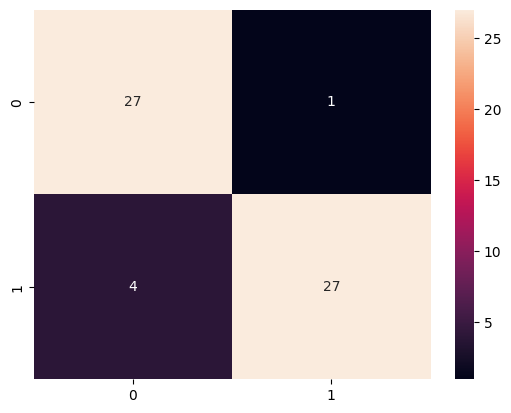

In [42]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [43]:
print(accuracy_score(y_test,y_pred))

0.9152542372881356


In [44]:
print(f1_score(y_test,y_pred))

0.9152542372881356


In [45]:
param_grid = { 
    'n_estimators': [5, 6, 7, 8],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [46]:
CV_rfc = GridSearchCV(estimator=model_ranfor, param_grid=param_grid, cv= 5)
grid_fit_ranfor = CV_rfc.fit(X_train, y_train)

In [47]:
best_ranfor = CV_rfc.best_estimator_

In [48]:
y_pred_best_ranfor = best_ranfor.predict(X_test)

print(accuracy_score(y_test,y_pred_best_ranfor))
print(f1_score(y_test,y_pred_best_ranfor))

0.9661016949152542
0.9666666666666666


# 5. Logistic Regression

In [49]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = model_logreg.predict(X_test)
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0]


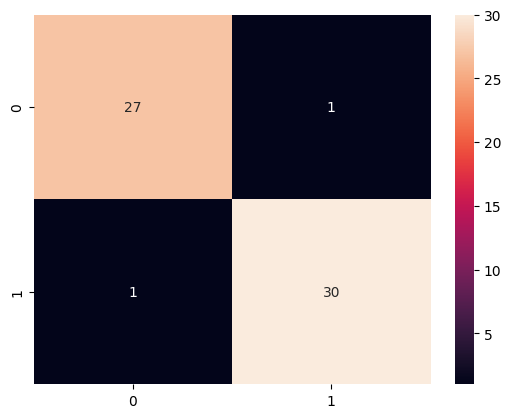

In [51]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [52]:
print(accuracy_score(y_test,y_pred))

0.9661016949152542


In [53]:
print(f1_score(y_test,y_pred))

0.967741935483871


In [54]:
warnings.filterwarnings("ignore")
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.9785383903792784


# 6. SVM

In [55]:
model_svm = svm.SVC(random_state=1)
model_svm.fit(X_train, y_train)

SVC(random_state=1)

In [56]:
y_pred = model_svm.predict(X_test)
print('Test Output:',y_test.values)
print('Predicted: ',y_pred)

Test Output: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]
Predicted:  [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0]


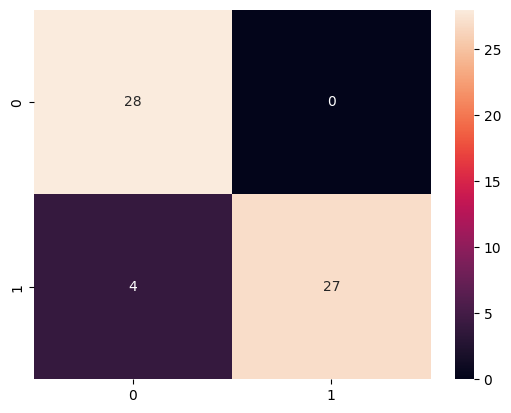

In [57]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [58]:
print(accuracy_score(y_test,y_pred))

0.9322033898305084


In [59]:
print(f1_score(y_test,y_pred))

0.9310344827586207


In [62]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)

parameters = {'C':[0.1, 1, 10, 100, 1000],'kernel':['linear','poly','rbf','sigmoid'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
scorer = make_scorer(f_beta_score)
clf = svm.SVC()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)
print(accuracy_score(y_test,best_predictions))
print(grid_obj.best_estimator_)

0.9322033898305084
SVC(C=0.1, gamma=1, kernel='linear')


In this GridSearchCV method, we came up with the best result when the kernel was selected as linear.

# Conclusion

After exploring the ASD dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used two different metric (such as accuracy and F1-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases. 

I think to build a more accurate model, we need to have access to more larger datasets. 